#**Analysing Academic Performance of College Students**

##Link to Data Set : [Data](https://archive.ics.uci.edu/ml/datasets/Student+Performance)

##Link to Instructions to run the NoteBook : [Instructions](https://github.com/Rav317/DataAnalyticsProject)


In [1]:
# from google.colab import drive
# drive.mount('/content/drive',force_remount=True)

In [2]:
import numpy as np
import pandas as pd
from math import sqrt
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set()
%matplotlib inline

Reading the data

In [3]:
#data=pd.read_csv(r"/content/drive/My Drive/student-mat.csv")
data=pd.read_csv(r"student-mat.csv")
print(data.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


#Overview of Data

In [4]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [5]:
print('Total number of students:',len(data))

Total number of students: 395


In [6]:
data['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

In [7]:
data.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

No NULL values found throughout the dataset

#EDA

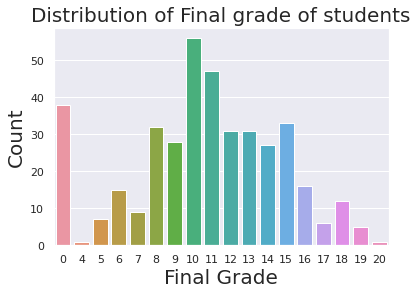

Distribution is normal according to the graph


In [8]:
b = sns.countplot(data['G3'])
b.axes.set_title('Distribution of Final grade of students', fontsize = 20)
b.set_xlabel('Final Grade', fontsize = 20)
b.set_ylabel('Count', fontsize = 20)
plt.show()

print("Distribution is normal according to the graph")

In [9]:
male_studs = len(data[data['sex'] == 'M'])
female_studs = len(data[data['sex'] == 'F'])
print('Number of male students:',male_studs)
print('Number of female students:',female_studs)

Number of male students: 187
Number of female students: 208


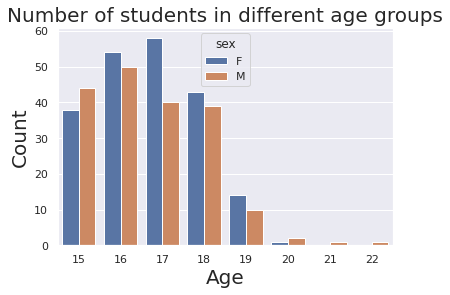

In [10]:
b = sns.countplot('age',hue='sex', data=data)
b.axes.set_title('Number of students in different age groups',fontsize=20)
b.set_xlabel("Age",fontsize=20)
b.set_ylabel("Count",fontsize=20)
plt.show()

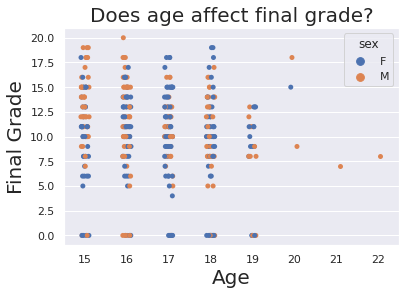

In [11]:
b = sns.stripplot(x='age', y='G3',hue='sex', data=data)
b.axes.set_title('Does age affect final grade?', fontsize = 20)
b.set_xlabel('Age', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

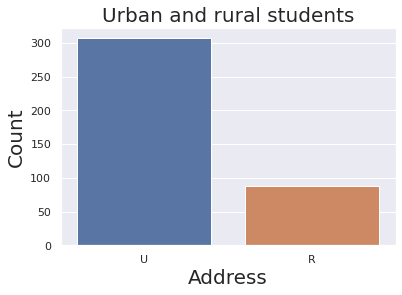

In [12]:
b = sns.countplot(data['address'])
b.axes.set_title('Urban and rural students', fontsize = 20)
b.set_xlabel('Address', fontsize = 20)
b.set_ylabel('Count', fontsize = 20)
plt.show()

Most students are from urban ares, but do urban students perform better than rurual students?

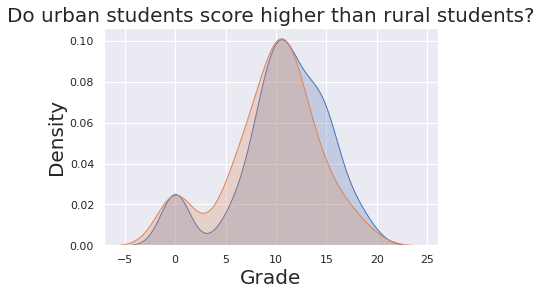

In [13]:
# Grade distribution by address
sns.kdeplot(data.loc[data['address'] == 'U', 'G3'], label='Urban', shade = True)
sns.kdeplot(data.loc[data['address'] == 'R', 'G3'], label='Rural', shade = True)
plt.title('Do urban students score higher than rural students?', fontsize = 20)
plt.xlabel('Grade', fontsize = 20);
plt.ylabel('Density', fontsize = 20)
plt.show()

The graph shows that on there is not much difference between the scores based on location.

Reason to choose this school

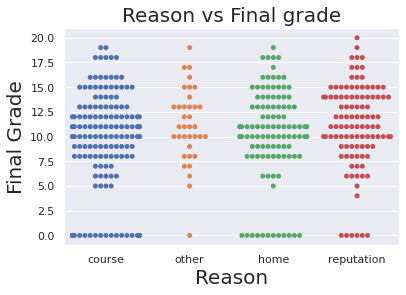

In [14]:
b = sns.swarmplot(x='reason', y='G3', data=data)
b.axes.set_title('Reason vs Final grade', fontsize = 20)
b.set_xlabel('Reason', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

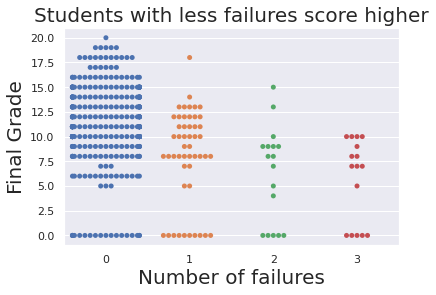

In [15]:
b = sns.swarmplot(x=data['failures'],y=data['G3'])
b.axes.set_title('Students with less failures score higher', fontsize = 20)
b.set_xlabel('Number of failures', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

### One hot encoding
For Example : 

| address    | address_U      | address_R 
| ---------- |:-------------: |:------------- |
| U          | 1              | 0             |
| R          | 0              | 1             |

In [16]:
data = pd.get_dummies(data)

###Continued EDA

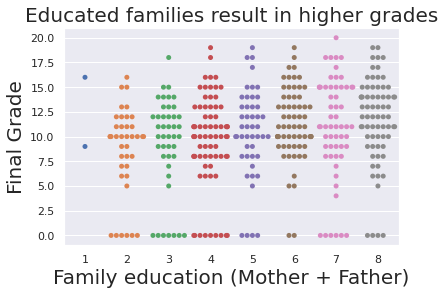

In [17]:
family_ed = data['Fedu'] + data['Medu'] 
b = sns.swarmplot(x=family_ed,y=data['G3'])
b.axes.set_title('Educated families result in higher grades', fontsize = 20)
b.set_xlabel('Family education (Mother + Father)', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

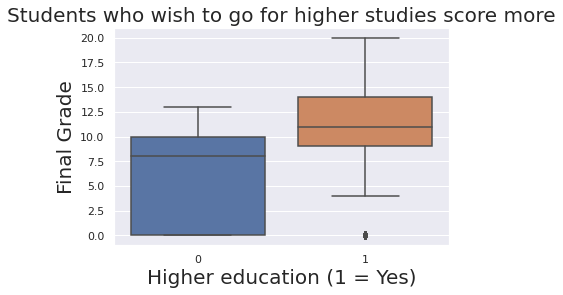

In [18]:
#student.columns
b = sns.boxplot(x = data['higher_yes'], y=data['G3'])
b.axes.set_title('Students who wish to go for higher studies score more', fontsize = 20)
b.set_xlabel('Higher education (1 = Yes)', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

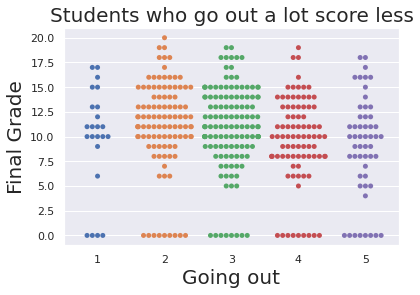

In [19]:
b = sns.swarmplot(x=data['goout'],y=data['G3'])
b.axes.set_title('Students who go out a lot score less', fontsize = 20)
b.set_xlabel('Going out', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

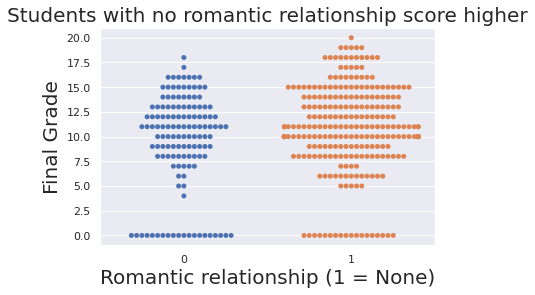

In [20]:
b = sns.swarmplot(x=data['romantic_no'],y=data['G3'])
b.axes.set_title('Students with no romantic relationship score higher', fontsize = 20)
b.set_xlabel('Romantic relationship (1 = None)', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

<BarContainer object of 395 artists>

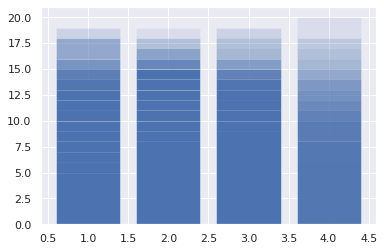

In [21]:
plt.bar(data["studytime"],data["G3"],label="Studytime Affecting Grades",alpha=0.1)

<BarContainer object of 395 artists>

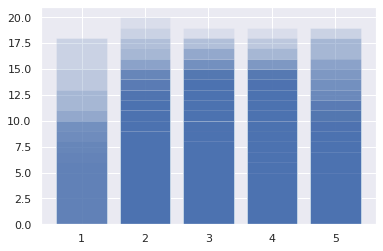

In [22]:
plt.bar(data["freetime"],data["G3"],label="Studytime Affecting Grades",alpha=0.1)

<BarContainer object of 395 artists>

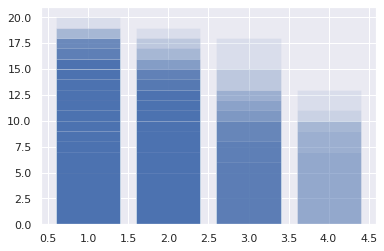

In [23]:
plt.bar(data["traveltime"],data["G3"],label="Studytime Affecting Grades",alpha=0.1)

#Preprocessing

We use a combination of the columns G1, G2 and G3 as a dependent variable. 

So we have to create that and remove some other unnecessary columns.

In [24]:
# final grade of students out of 100
data["Grades"] = (data["G1"]*0.2 + data["G2"]*0.2 + data["G3"]*0.6)*5

#removing redundant columns
rem_col = ['school_GP', 'school_MS', 'reason_course', 'reason_home', 'reason_other', 'guardian_father', 'guardian_mother', 'guardian_other', 'nursery_yes', 'nursery_no', 'G1', 'G2', 'G3', 'Dalc']
for col in rem_col:
  data.drop(col, axis = 1, inplace = True)
  
print(data.head())


   age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         3       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Walc  ...  paid_yes  activities_no  activities_yes  higher_no  higher_yes  \
0     1  ...         0              1               0          0           1   
1     1  ...         0              1               0          0           1   
2     3  ...         1              1               0          0           1   
3     1  ...         1              0               1          0           1   
4     2  ...         1              1               0          0           1   

   internet_no  internet_yes  romantic

In [25]:
corr = data.corr()

<AxesSubplot:>

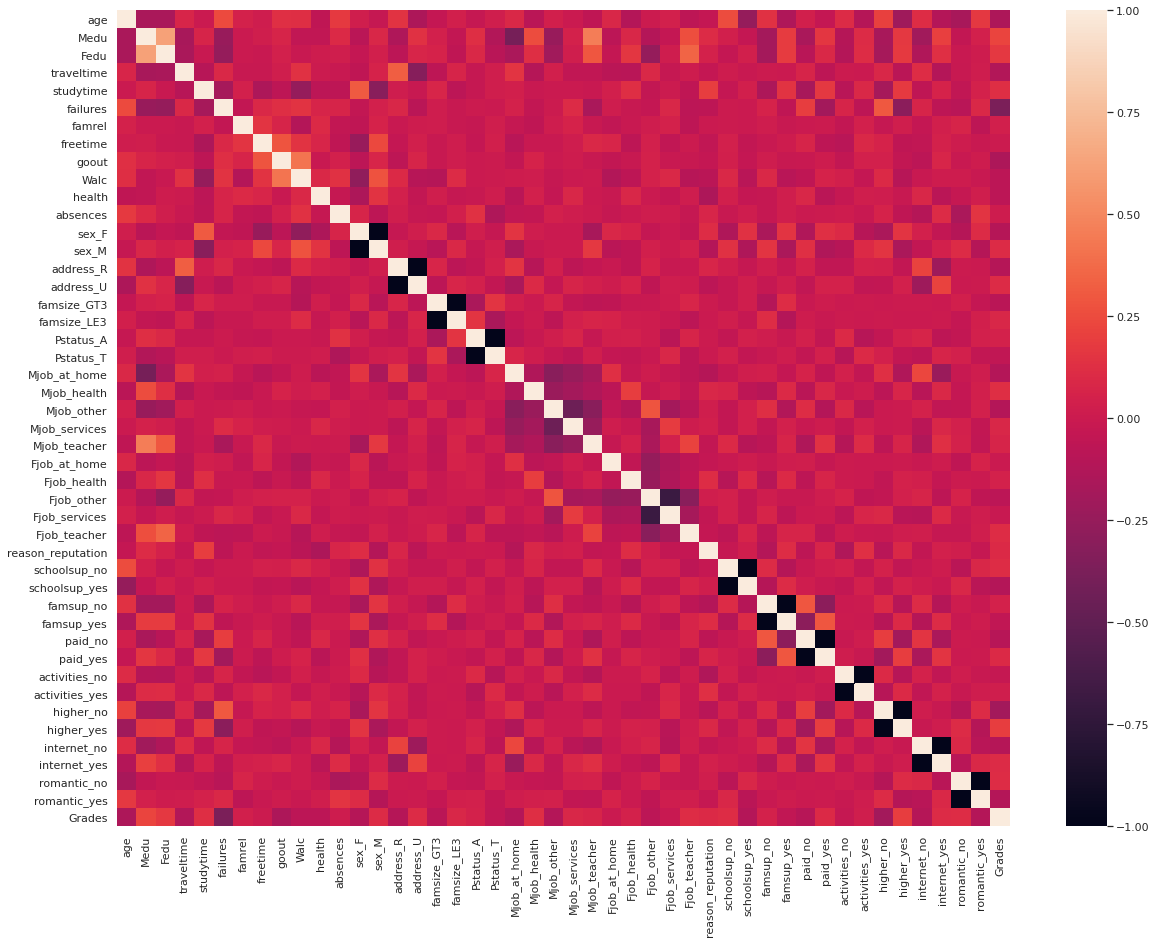

In [26]:
plt.subplots(figsize=(20,15))
sns.heatmap(corr)

In [27]:
# removing columns having strong coorelation with other independent variables

columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.7:
            if columns[j]:
                columns[j] = False
                
selected_columns = data.columns[columns]
data2 = data[selected_columns]
print(set(data.columns)-set(data2.columns))

set()


No such highly dependent columns found.

#Model Deployment

In [28]:
# model library imports
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn import neighbors
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures

#helper libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, chi2

Data splitting is done in a ratio 70% - Train ; 30% - Test.

In [29]:
# data splitting
data_copy_1 = data.copy()
y = data_copy_1['Grades'].values
data_copy_1.drop('Grades', axis = 1, inplace = True)
X = data_copy_1.values
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

All the models' metrics are stored in a dictionary for later comparisions.

In [30]:
# dictionary to store metrics of models
test_results = {}

Functions for cross validation and tracking metrics are made which are called from all the models tried out

In [31]:
def cross_val(model_name, model, X_train, y_train):
  score = cross_val_score(model, X_train, y_train)
  test_results[model_name] = {}
  test_results[model_name]["CV"] = score.mean()

In [32]:
def metrics_calc(model_name, y_test, y_pred):
  test_results[model_name]["MAE"] = mean_absolute_error(y_test, y_pred)
  test_results[model_name]["RMSE"]= mean_squared_error(y_test, y_pred, squared=False)
  test_results[model_name]["R2"] = r2_score(y_test, y_pred)

The Following Models are tested out : 

## Random Forest

In [33]:
def RandomForest(X_train, y_train, X_test, y_test):
	regr = RandomForestRegressor()
	cross_val("RandomForest", regr, X_train, y_train)
	regr.fit(X_train, y_train)
	y_pred = regr.predict(X_test)
	metrics_calc("RandomForest", y_test, y_pred)
RandomForest(X_train, y_train, X_test, y_test)

##SVM

In [34]:
def SVM(X_train, y_train, X_test, y_test):

	# scaling the data
	sc_X = StandardScaler()
	sc_y = StandardScaler()
	X_train_scaled = sc_X.fit_transform(X_train)
	y_train_scaled = sc_y.fit_transform(y_train.reshape(-1,1))

	# creating Support Vector Regression object
	reg = SVR(kernel = "rbf")
	cross_val("SVM", reg, X_train_scaled, y_train_scaled)
 
	reg.fit(X_train_scaled, y_train_scaled)

	# predicting
	y_pred = reg.predict(X_test)

	# inverse tranformation is required to get the prediction on original scale
	y_pred = sc_y.inverse_transform(y_pred)
	#calculating metrics
	metrics_calc("SVM", y_test, y_pred)

SVM(X_train, y_train, X_test, y_test)

##Neural networks

In [35]:
def DNN(X_train, y_train, X_test, y_test):
  y_train=y_train.astype('int')
  y_test=y_test.astype('int')
  
  scaler = MinMaxScaler(feature_range=(0, 1))
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.fit_transform(X_test)

  regr = MLPRegressor(random_state=0, max_iter=6250, activation = 'relu', early_stopping=True)
  cross_val("DNN", regr, X_train_scaled, y_train)

  regr.fit(X_train_scaled, y_train)

  y_pred = regr.predict(X_test_scaled)
  #calculating metrics
  metrics_calc("DNN", y_test, y_pred)
  
DNN(X_train, y_train, X_test, y_test)

##KNN


Best K value =  18
RMSE =  19.795003199683627


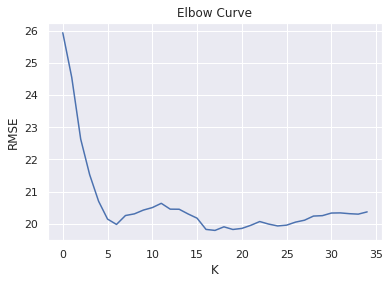

In [36]:
def KNN(X_train, y_train, X_test, y_test):

  scaler = MinMaxScaler(feature_range=(0, 1))
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.fit_transform(X_test)

  max_k = 35
  best_k = 0  # stores the optimum K value
  min_val = 100
  models = []  # storing models for different K
  rmse_val = [] # storing rmse values for different K
  for K in range(max_k):
      K = K+1
      # instantiating the KNN model
      model = neighbors.KNeighborsRegressor(n_neighbors = K, p=3)

      # fitting the model
      model.fit(X_train_scaled, y_train)

      # getting predictions
      y_pred=model.predict(X_test_scaled)

      # calculating rmse
      err = sqrt(mean_squared_error(y_test,y_pred))  #calculate rmse

      # getting the optimum K value
      if min_val > err:
        min_val = err
        best_k = K
      
      # storing rmse values and the fitted model
      rmse_val.append(err)
      models.append(model)

  print("\nBest K value = ", best_k)
  print("RMSE = ", rmse_val[best_k-1])

    
  # Plotting Elbow Curve
  curve = pd.DataFrame(rmse_val)
  curve.plot()
  
  plt.title("Elbow Curve")
  plt.xlabel("K")
  plt.ylabel("RMSE")
  legend = plt.legend([])
  legend.remove()
  plt.show()

  # using the best_k value for the model
  # testing
  X_test_scaled = scaler.fit_transform(X_test)
  cross_val("KNN", models[best_k-1] , X_train_scaled, y_train)
  # predicting
  y_pred = models[best_k-1].predict(X_test_scaled)

  #calculating metrics
  metrics_calc("KNN", y_test, y_pred)

KNN(X_train, y_train, X_test, y_test)

##Linear Regression

In [37]:
def LinearReg(X_train, y_train, X_test, y_test):

  model = LinearRegression(fit_intercept=True)

  cross_val("LinearReg", model , X_train, y_train)
  
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

#calculating metrics
  metrics_calc("LinearReg", y_test, y_pred)

LinearReg(X_train, y_train, X_test, y_test)


##Ridge Regression

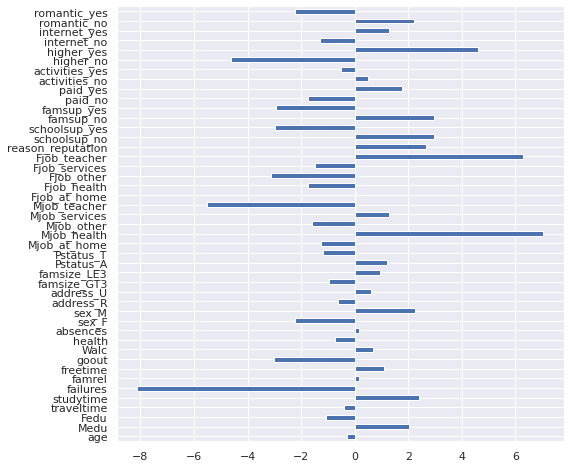

In [38]:
def Ridge_Reg(X_train, y_train, X_test, y_test):

  rid_reg = Ridge(alpha = 1)

  cross_val("RidgeReg", rid_reg , X_train, y_train)

  rid_reg.fit(X_train, y_train)

  # plotting importance of features
  plt.figure(figsize=(8,8))
  importance = pd.Series(rid_reg.coef_, index = data_copy_1.columns)
  importance.plot(kind = 'barh')
  plt.show()

  # Prediction
  y_pred = rid_reg.predict(X_test)

  # calculating metrics
  metrics_calc("RidgeReg", y_test, y_pred)

Ridge_Reg(X_train, y_train, X_test, y_test)


##Lasso Regression

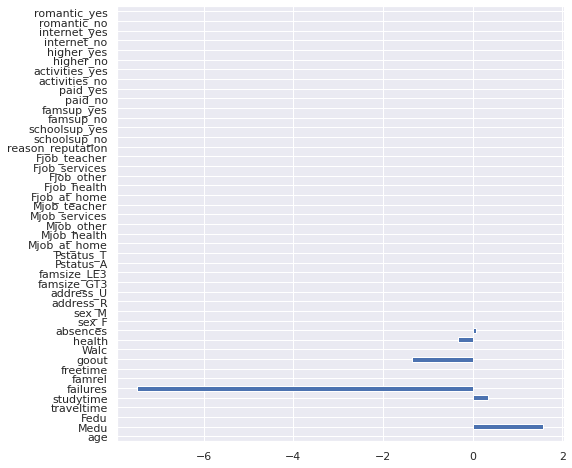

R2 value =  15.77


In [39]:
def Lasso_Reg(X_train, y_train, X_test, y_test):

  las_reg = Lasso(alpha = 1)

  cross_val("LassoReg", las_reg , X_train, y_train)

  las_reg.fit(X_train, y_train)

  # plotting importance of features
  plt.figure(figsize=(8,8))
  importance = pd.Series(las_reg.coef_, index = data_copy_1.columns)
  importance.plot(kind = 'barh')
  plt.show()

  # R2 value
  print("R2 value = ", np.round(las_reg.score(X_test, y_test)*100, 2))

  # Prediction
  y_pred = las_reg.predict(X_test)

  # calculating metrics
  metrics_calc("LassoReg", y_test, y_pred)

Lasso_Reg(X_train, y_train, X_test, y_test)


##Elastic Net Regression

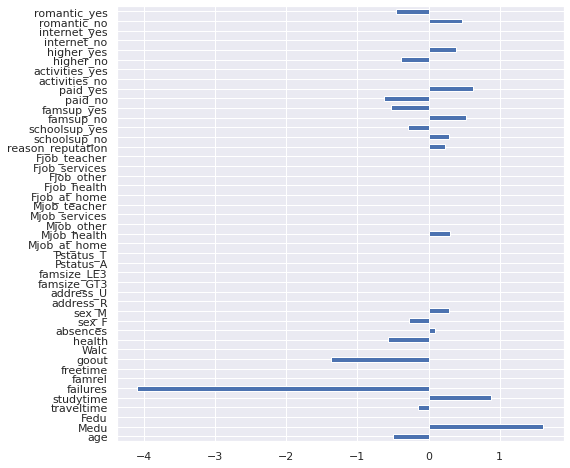

R2 value =  15.17


In [40]:
def Elastic_Net(X_train, y_train, X_test, y_test):

  el_net = ElasticNet()

  cross_val("ElasticNet", el_net , X_train, y_train)

  el_net.fit(X_train, y_train)

  # plotting importance of features
  plt.figure(figsize=(8,8))
  importance = pd.Series(el_net.coef_, index = data_copy_1.columns)
  importance.plot(kind = 'barh')
  plt.show()

  # R2 value
  print("R2 value = ", np.round(el_net.score(X_test, y_test)*100, 2))

  # Prediction
  y_pred = el_net.predict(X_test)

  # calculating metrics
  metrics_calc("ElasticNet", y_test, y_pred)

Elastic_Net(X_train, y_train, X_test, y_test)


##Polynomial Regression

In [41]:
def Poly_Reg(X_train, y_train, X_test, y_test):
  
  poly = PolynomialFeatures(degree = 2)
  
  X_train_poly = poly.fit_transform(X_train)
  
  # poly.fit(X_train_poly, y_train)  

  lin = LinearRegression()
  
  cross_val("PolyReg", lin , X_train_poly, y_train)

  lin.fit(X_train_poly, y_train)

  y_pred = lin.predict(poly.fit_transform(X_test))

  # calculating metrics
  metrics_calc("PolyReg", y_test, y_pred)

# Poly_Reg(X_train, y_train, X_test, y_test)

#Results

In [42]:
# test_results

In [43]:
df = pd.DataFrame.from_dict(test_results)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df)

      RandomForest        SVM        DNN        KNN  LinearReg   RidgeReg  \
CV        0.237090   0.130025   0.004070  -0.016718   0.025920   0.034953   
MAE      14.246723  16.991542  16.155231  16.352007  14.592077  14.603292   
RMSE     17.459136  20.778429  19.541230  19.795003  18.088516  18.065069   
R2        0.294009   0.000049   0.114880   0.092462   0.242192   0.244155   

       LassoReg  ElasticNet  
CV     0.139741    0.118093  
MAE   15.444172   15.512755  
RMSE  19.070322   19.137524  
R2     0.157695    0.151748  


A graph of the cross validation score of different models is plotted 

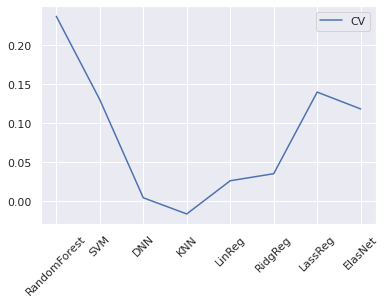

In [44]:
results1 = {"CV":[]}
for m_name in test_results:
  for met in results1:
    results1[met].append(test_results[m_name][met])

df1 = pd.DataFrame.from_dict(results1)
plt.xticks([i for i in range(0,9)],["RandomForest", "SVM", "DNN", "KNN", "LinReg", "RidgReg", "LassReg", "ElasNet", "PolyReg"], rotation=45)
plt.plot(df1)
plt.legend(["CV"])
plt.show()

A graph of the R2 score of different models is plotted 

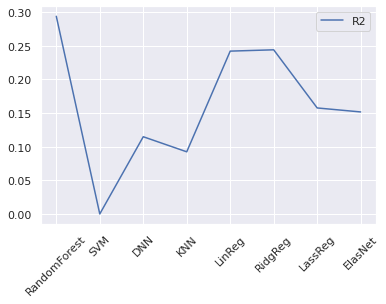

In [45]:
results2 = {"R2":[]}
for m_name in test_results:
  for met in results2:
    results2[met].append(test_results[m_name][met])

df2 = pd.DataFrame.from_dict(results2)
plt.xticks([i for i in range(0,9)],["RandomForest", "SVM", "DNN", "KNN", "LinReg", "RidgReg", "LassReg", "ElasNet", "PolyReg"], rotation=45)
plt.plot(df2)
plt.legend(["R2"])
plt.show()

A graph of the MAE and RMSE of different models is plotted

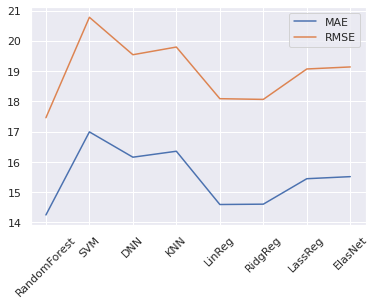

In [46]:
results3 = {"MAE":[], "RMSE":[]}
for m_name in test_results:
  for met in results3:
    results3[met].append(test_results[m_name][met])

df3 = pd.DataFrame.from_dict(results3)
plt.xticks([i for i in range(0,9)],["RandomForest", "SVM", "DNN", "KNN", "LinReg", "RidgReg", "LassReg", "ElasNet", "PolyReg"], rotation=45)
plt.plot(df3)
plt.legend(["MAE", "RMSE"])
plt.show()

In [47]:
# results4 = {"accuracy":[]}
# for m_name in test_results:
#   results4['accuracy'].append(test_results[m_name]['accuracy'])

# df4 = pd.DataFrame.from_dict(results4)
# plt.xticks([i for i in range(0,9)],["RandomForest", "SVM", "DNN", "KNN", "LinReg", "RidgReg", "LassReg", "ElasNet", "PolyReg"], rotation=45)
# plt.plot(df4)
# plt.legend(["accuracy"])
# plt.show()

In [48]:
print("The best model overall is "+ "\033[1m Random Forest \033[0m" +" with:")
for met in test_results["RandomForest"]:
  print("\033[1m"+met+"\033[0m", "=" ,test_results["RandomForest"][met])

The best model overall is  Random Forest  with:
CV = 0.23708970731006201
MAE = 14.24672268907563
RMSE = 17.45913591477987
R2 = 0.29400939545439364


R2 score for Polynomial Regression is negative, indicating that the model did not follow the trend and thus RSS became greater than TSS resuling in negative value.

#Tuning Params

Random Search and Grid Search are performed in the model to obtain the best set of parameters.

**Note: Function call to this function has been commented for faster run time and reducing redundant processing (The cell takes approximately 10 minutes to run). The output of this cell is saved in the following cell for reference**


In [49]:
%%time
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

def RandomForest_final(X_train, y_train, X_test, y_test):
  #default model
  regr = RandomForestRegressor()
  regr.fit(X_train, y_train)
  y_pred = regr.predict(X_test)
  basic_model = mean_squared_error(y_test,y_pred,squared = False)
  print("RMSE : ", basic_model)
  print(regr.get_params)
  
  
  #model with random search

  n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]
  max_features = ['auto', 'sqrt']
  max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
  max_depth.append(None)
  min_samples_split = [2, 5, 10]
  min_samples_leaf = [1, 2, 4]
  bootstrap = [True, False]
  random_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap}
  #rf = RandomForestRegressor(n_estimators= 2000, min_samples_split = 10, min_samples_leaf = 2, max_features = 'auto' , max_depth = 40, bootstrap = True)
  rf = RandomForestRegressor()
  rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
  rf_random.fit(X_train, y_train)
  print(rf_random.best_params_)
  #{'n_estimators': 2000, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 40, 'bootstrap': True}
  y_pred = rf_random.predict(X_test)

  randomsearch_model = mean_squared_error(y_test,y_pred,squared = False)
  #calculating metrics
  #metrics_calc("RandomForest", y_test, y_pred)

  #model with Grid Search
  # Create the parameter grid based on the results of random search 
  param_grid = {
      'bootstrap': [True],
      'max_depth': [80, 90, 100, 110],
      'max_features': [2, 3],
      'min_samples_leaf': [3, 4, 5],
      'min_samples_split': [8, 10, 12],
      'n_estimators': [100, 200, 300, 1000]
  }
  # Create a based model
  rf = RandomForestRegressor()
  # Instantiate the grid search model
  grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                            cv = 3, n_jobs = -1, verbose = 2)
  grid_search.fit(X_train, y_train)
  print(grid_search.best_params_)
  best_grid = grid_search.best_estimator_
  #grid_accuracy = evaluate(best_grid, X_train, y_train)
  gridsearch_model = mean_squared_error(y_test,y_pred,squared = False)


  print("Basic  : ",basic_model)
  print("Random : ",randomsearch_model)
  print("Grid   : ",gridsearch_model)


#RandomForest_final(X_train, y_train, X_test, y_test)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs


Basic Model's default parameters prove to be better than searched parameters. 

So we continue forward with the dafault parameters. 

**<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)>**


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   23.7s


[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.7min


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.2min finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'n_estimators': 10, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   14.6s


[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.1min


[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  2.5min


[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  4.5min


{'bootstrap': True, 'max_depth': 110, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}


**Basic  :  17.160106829112536**

**Random :  18.09209211287278**

**Grid   :  18.09209211287278** 


[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  6.0min finished

# Feature Selection

In [50]:

data_copy_2 = data.copy()
y = data_copy_2['Grades'].values
data_copy_2.drop('Grades', axis = 1, inplace = True)
X = data_copy_2.values
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


model = RandomForestRegressor(random_state=44)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test,y_pred,squared = False)
print("Before FS :  ", rmse)

feature_importances = pd.DataFrame(model.feature_importances_,
                                  index = data_copy_2.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
# print(feature_importances)
indices = np.argsort(feature_importances)

for i in range(feature_importances.shape[0]):
  if (feature_importances["importance"][i] <= 0.008):
    data_copy_2.drop(feature_importances.index[i], axis = 1, inplace = True)

X = data_copy_2.values
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

model2 = RandomForestRegressor(random_state=33)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
rmse2 = mean_squared_error(y_test,y_pred,squared = False)

print("After FS  :  ", rmse2)

Before FS :   17.326640633147907
After FS  :   17.18486751268602


RMSE of final model in training and testing set

In [51]:
y_pred_train = model2.predict(X_train)
print("Error in Training Set : ",mean_squared_error(y_train,y_pred_train,squared = False))
y_pred_train = model2.predict(X_test)
print("Error in Testing Set : ",mean_squared_error(y_test,y_pred_train,squared = False))

Error in Training Set :  6.505430396036926
Error in Testing Set :  17.18486751268602


#Final Graphs

Graph showing importances of various features

<AxesSubplot:>

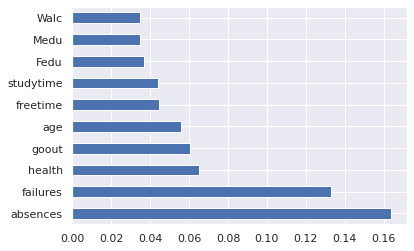

In [52]:
(pd.Series(model2.feature_importances_, index=data_copy_2.columns)
   .nlargest(10)
   .plot(kind='barh'))

Predicted values v/s True values


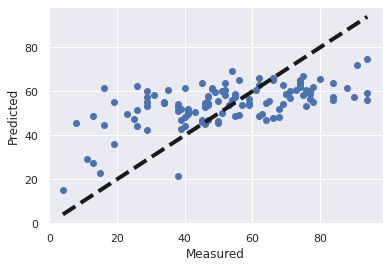

In [53]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

#Thank You
###Team - Unpredicting
###Members - Ishan Agarwal, Raghav Goyal, Akash Kumar Rao